# Multidimensional differential equations

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import integrate

## Heat equation

We solve the differential equations:

$$
\frac{\partial}{\partial t} u(\vec{r},t) = a \Delta u(\vec{r},t)
$$

## In one dimension:

$$
\frac{\partial}{\partial t} u(x,t) = a \frac{\partial^2}{\partial x^2} u(x,t)
$$

Here, $ u(x,t) $ is an array $\{ u_1, u_2, \dots, u_n \}$ that has different values for different times. It describes the temperature. We can discretize the spatial derivative according to:

$$
\frac{\partial^2}{\partial x^2} u_j = \frac{u_{j+1}-2u_{j}+u_{j-1}}{(\Delta x)^2}
$$

For the edges we use double-forward or double-backward methods:

$$
\frac{\partial^2}{\partial x^2} u_1 = \frac{u_{1}-2u_{2}+u_{3}}{(\Delta x)^2}\\
\frac{\partial^2}{\partial x^2} u_n = \frac{u_{n}-2u_{n-1}+u_{n-2}}{(\Delta x)^2}
$$

We can rewrite the heat equation as a set of coupled equation:

\begin{align}
\frac{\partial}{\partial t}u_1&=\frac{a}{(\Delta x)^2}\left(u_1-2u_2+u_3\right)\\
\frac{\partial}{\partial t}u_2&=\frac{a}{(\Delta x)^2}\left(u_1-2u_2+u_3\right)\\
\frac{\partial}{\partial t}u_3&=\frac{a}{(\Delta x)^2}\left(u_2-2u_3+u_4\right)\\ 
\vdots\\ 
\frac{\partial}{\partial t}u_j&=\frac{a}{(\Delta x)^2}\left(u_{j-1}-2u_j+u_{j+1}\right)\\ 
\vdots\\
\frac{\partial}{\partial t}u_{n-2}&=\frac{a}{(\Delta x)^2}\left(u_{n-3}-2u_{n-2}+u_{n-1}\right)\\
\frac{\partial}{\partial t}u_{n-1}&=\frac{a}{(\Delta x)^2}\left(u_{n-2}-2u_{n-1}+u_{n}\right)\\
\frac{\partial}{\partial t}u_n&=\frac{a}{(\Delta x)^2}\left(u_{n-2}-2u_{n-1}+u_{n}\right)
\end{align}

Alternatively, we can also keep the temperature at the edges constant and consider these to be (part of) the constant heat bath:

$ u_1 = \mathrm{const.}\\ u_n = \mathrm{const.} $


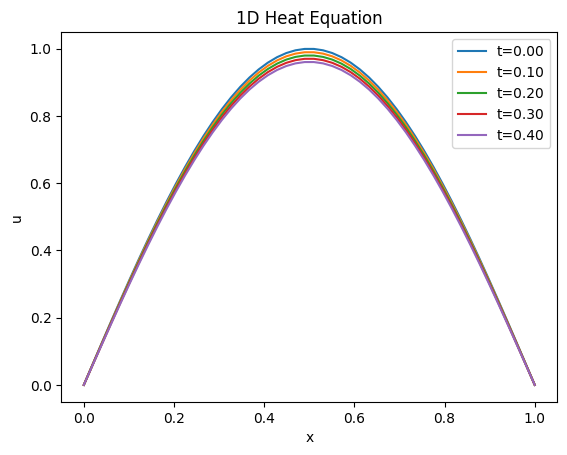

In [14]:
### N dimensional systems (in lorentz, i have 3 dimensional systems)
def heat_equation_1D(t, u, a, dx, n):
    dudt = np.zeros(n)
    for j in range(1, n-1):
        dudt[j] = a* (u[j+1] -2*u[j] + u[j-1]) / dx**2
        
    dudt[0] = dudt[-1] = 0
    
    return dudt

# Parameters
n = 50          # Number of grid points
x = np.linspace(0, 1, n)
dx = x[1] - x[0]
a = 0.01        # Thermal diffusivity
t_span = (0, 0.5)  # Time range
u0 = np.sin(np.pi * x)  # Initial condition

# Solve
sol = integrate.solve_ivp(heat_equation_1D, t_span, u0, args=(a, dx, n), method="RK45", t_eval=np.linspace(0, 0.5, 100))

 #Plot
for i in range(0, len(sol.t), 20):
    plt.plot(x, sol.y[:, i], label=f't={sol.t[i]:.2f}')
plt.xlabel('x')
plt.ylabel('u')
plt.title('1D Heat Equation')
plt.legend()
plt.show()

### Different starting parameters

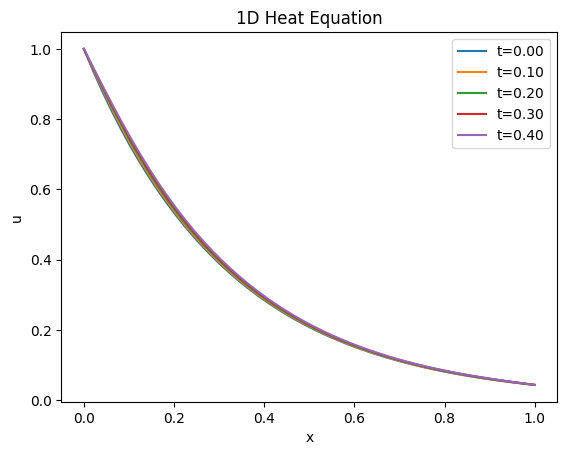

In [18]:
# Parameters
n = 50          # Number of grid points
x = np.linspace(0, 1, n)
dx = x[1] - x[0]
a = 0.01        # Thermal diffusivity
t_span = (0, 0.5)  # Time range
u0 = np.exp(-np.pi * x)  # Initial condition


# Solve
sol = integrate.solve_ivp(heat_equation_1D, t_span, u0, args=(a, dx, n), method="RK45", t_eval=np.linspace(0, 0.5, 100))

 #Plot
for i in range(0, len(sol.t), 20):
    plt.plot(x, sol.y[:, i], label=f't={sol.t[i]:.2f}')
plt.xlabel('x')
plt.ylabel('u')
plt.title('1D Heat Equation')
plt.legend()
plt.show()

## In 2 dimensions

$$
\frac{\partial}{\partial t} u(\vec{r},t) = a \left(\frac{\partial^2}{\partial x^2} u(\vec{r},t) + \frac{\partial^2}{\partial y^2} u(\vec{r},t)\right)
$$

Here, $ u(\vec{r},t) $ is an array $\{ u_{1,1}, u_{1,2}, \dots, u_{n,n} \} $ that has different values for different times. We can discretize the spatial derivative according to:

$$
\frac{\partial^2}{\partial x^2} u_{i,j} + \frac{\partial^2}{\partial y^2} u_{i,j} = \frac{u_{i+1,j}-2u_{i,j}+u_{i-1,j}}{(\Delta x)^2}+\frac{u_{i,j+1}-2u_{i,j}+u_{i,j-1}}{(\Delta y)^2}
$$

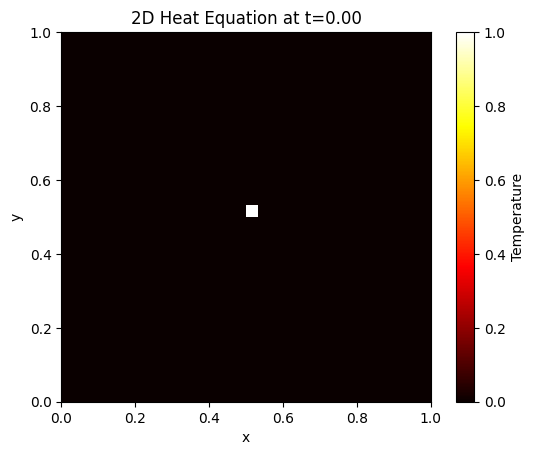

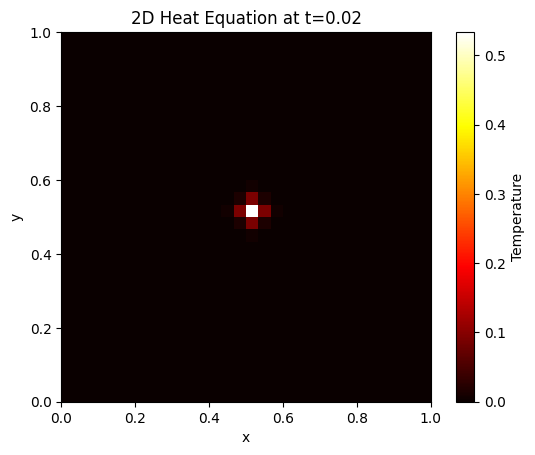

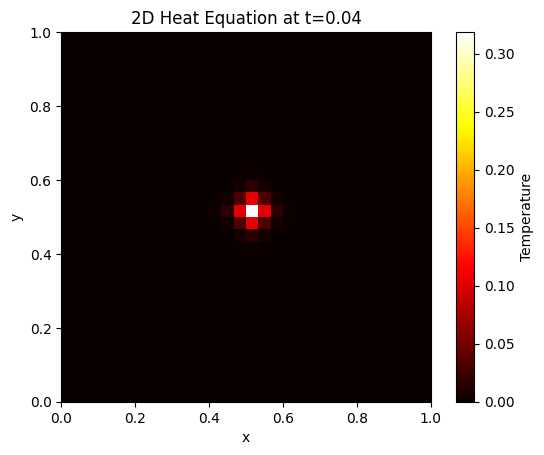

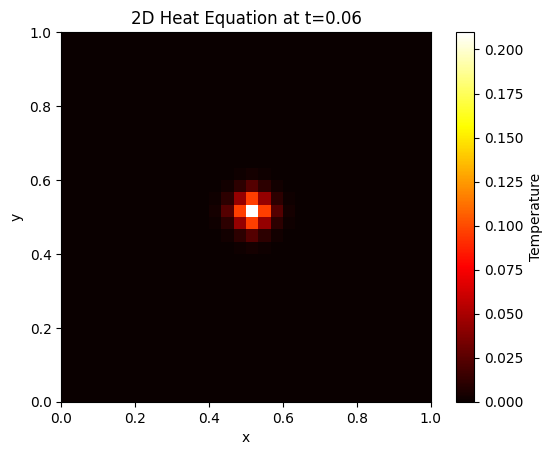

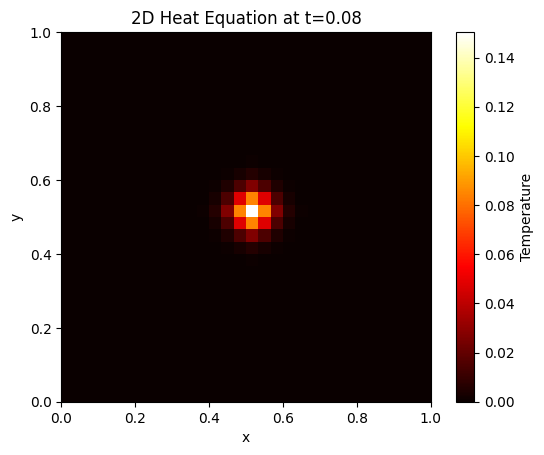

In [20]:
def heat_equation_2d(t, u, a, dx, dy, nx, ny):
    u = u.reshape((nx, ny))
    dudt = np.zeros_like(u)
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            dudt[i, j] = a * (
                (u[i+1, j] -2 * u[i, j] + u[i-1, j]) / dx**2 + \
                (u[i, j+1] - 2*u[i, j] + u[i, j-1]) / dy**2
            )
    ### Boundary conditions (Dirichlet)
    dudt[0, :] = dudt[-1, :] = dudt[:, 0] = dudt[:, -1] = 0
    return dudt.flatten()


# Parameters
nx, ny = 30, 30  # Grid points in x and y
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
dx = x[1] - x[0]
dy = y[1] - y[0]
a = 0.01  # Thermal diffusivity
t_span = (0, 0.1)  # Time range

# Initial condition (hot spot in the center)
u0 = np.zeros((nx, ny))
u0[nx//2, ny//2] = 1
u0 = u0.flatten()

# Solve
sol = integrate.solve_ivp(heat_equation_2d, t_span, u0, args=(a, dx, dy, nx, ny), method="RK45", t_eval=np.linspace(0, 0.1, 50))

# Plot
for i in range(0, len(sol.t), 10):
    plt.imshow(sol.y[:, i].reshape((nx, ny)), extent=[0, 1, 0, 1], origin='lower', cmap='hot')
    plt.colorbar(label='Temperature')
    plt.title(f'2D Heat Equation at t={sol.t[i]:.2f}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()